# Assignment 2

In [1]:
# Name- Hrithik Singh , MMgt 2nd year (20857)

In [2]:
#importing necessary libraries
library(quadprog)    # for employing quadratic programming 

library(DirichletReg)    # will use dirichlet distribution for monte-carlo simulation

library(dplyr)    # for data manipulation and transformation

Warning message:
"package 'DirichletReg' was built under R version 3.6.3"Loading required package: Formula

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Importing daily price data of eight s&p 500 companies across different sectors between date(2012-01-01 to 2023-08-31):    
Apple Inc. (AAPL)    
The Walt Disney Company (DIS)    
Johnson & Johnson (JNJ)    
JPMorgan Chase & Co. (JPM)    
Exxon Mobil Corporation (XOM)    
Procter & Gamble Company (PG)    
The Boeing Company (BA)    
NextEra Energy, Inc. (NEE)    
    

In [3]:
daily_asset <- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_2/daily_asset.csv')
daily_asset$Date <- as.Date(daily_asset$Date)    # converting date column into date format

print(paste("data of daily prices of 8 companies"))
head(daily_asset)

[1] "data of daily prices of 8 companies"


Date,AAPL,BA,DIS,JNJ,JPM,NEE,PG,XOM
2012-01-03,12.46609,60.73111,34.30062,47.34120,25.17675,10.70763,47.32185,53.58889
2012-01-04,12.53309,60.82109,34.78410,47.05378,25.33624,10.68038,47.30061,53.60135
2012-01-05,12.67223,60.16649,35.36608,46.99627,25.86543,10.81661,47.10233,53.43934
2012-01-06,12.80470,60.53472,35.73318,46.58668,25.63346,10.70218,46.98905,53.04055
2012-01-09,12.78439,60.98476,35.58991,46.65854,25.58995,10.71490,47.18731,53.27732
2012-01-10,12.83016,61.36933,35.48247,46.85255,26.13364,10.76212,46.96780,53.41442


In [4]:
# Calculating daily returns (in percentage) for each company column and storing them in a new data frame : daily_asset_returns
daily_asset_returns <- data.frame(
  AAPL = c(NA, diff(daily_asset$AAPL) / daily_asset$AAPL[-length(daily_asset$AAPL)])*100,
  BA = c(NA, diff(daily_asset$BA) / daily_asset$BA[-length(daily_asset$BA)])*100,
  DIS = c(NA, diff(daily_asset$DIS) / daily_asset$DIS[-length(daily_asset$DIS)])*100,
  JNJ = c(NA, diff(daily_asset$JNJ) / daily_asset$JNJ[-length(daily_asset$JNJ)])*100,
  JPM = c(NA, diff(daily_asset$JPM) / daily_asset$JPM[-length(daily_asset$JPM)])*100,
  NEE = c(NA, diff(daily_asset$NEE) / daily_asset$NEE[-length(daily_asset$NEE)])*100,
  PG = c(NA, diff(daily_asset$PG) / daily_asset$PG[-length(daily_asset$PG)])*100,
  XOM = c(NA, diff(daily_asset$XOM) / daily_asset$XOM[-length(daily_asset$XOM)])*100
)

#dropping the 1st null row
daily_asset_returns <- na.omit(daily_asset_returns)

#printing daily percentage return data
print(paste("daily percentage returns of 8 companies"))
head(daily_asset_returns)

[1] "daily percentage returns of 8 companies"


,AAPL,BA,DIS,JNJ,JPM,NEE,PG,XOM
2,0.5373998,0.1481631,1.409533,-0.6071371,0.6334837,-0.25444076,-0.04489269,0.02324885
3,1.1101977,-1.0762685,1.673114,-0.1222064,2.0886763,1.27548476,-0.41917583,-0.30225022
4,1.0453880,0.6120166,1.037989,-0.8715408,-0.8968335,-1.05793166,-0.24050839,-0.74624511
5,-0.1586168,0.7434330,-0.400940,0.1542364,-0.1697259,0.11885533,0.42193891,0.44639550
6,0.3580421,0.6306020,-0.301886,0.4158281,2.1246293,0.44069700,-0.46519483,0.25733317
7,-0.1630220,-0.3466396,-2.346725,-0.1073594,1.6921217,-0.06751501,-0.97994473,-0.74663608


Plotting histogram of daily returns of all companies for visualization

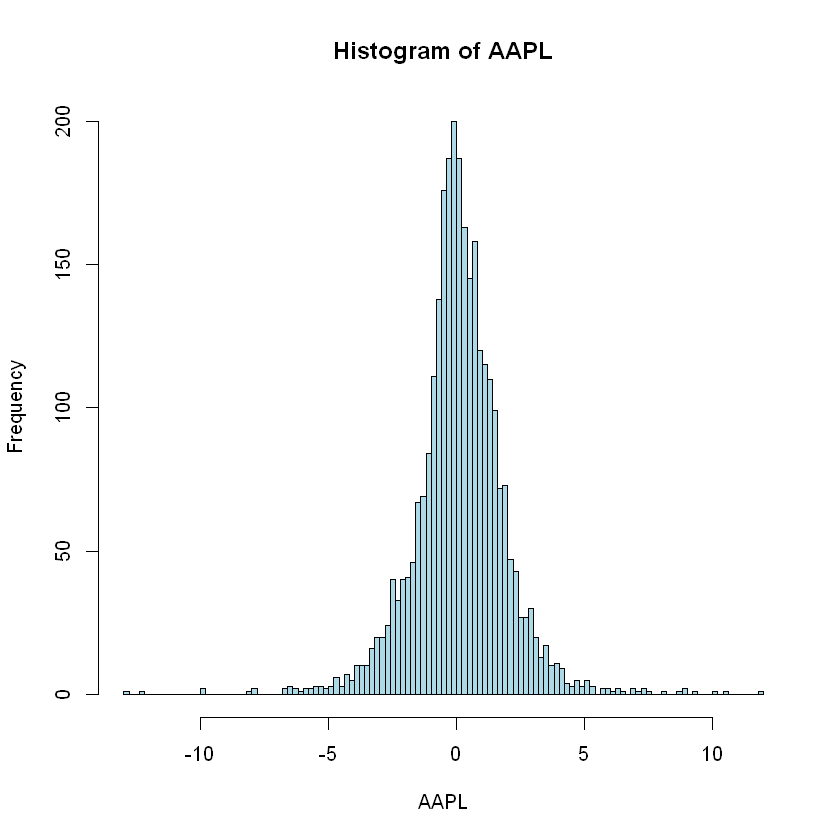

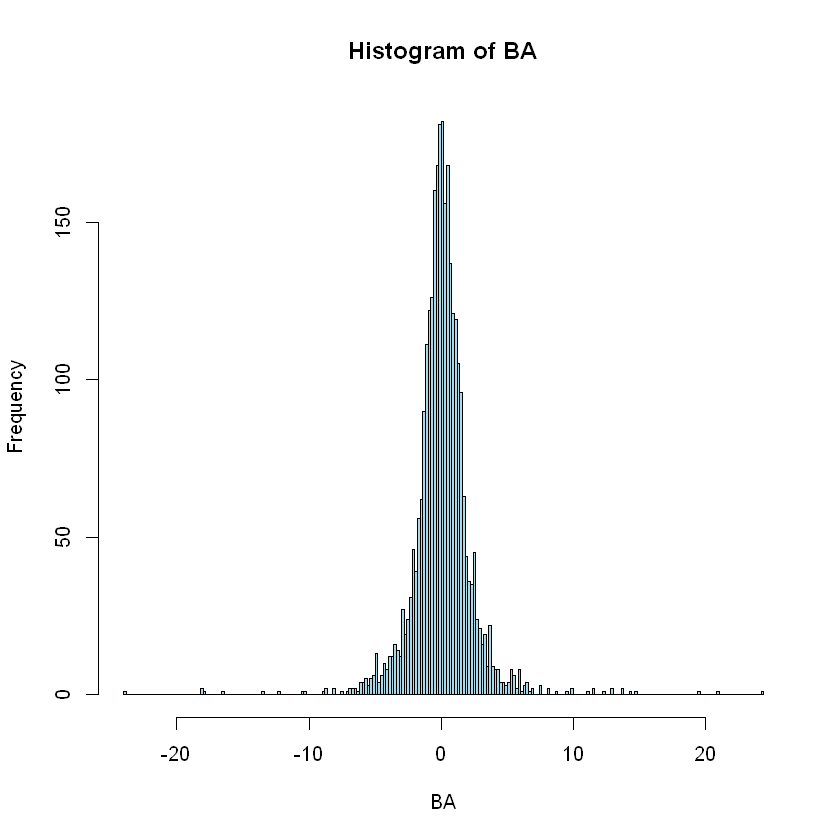

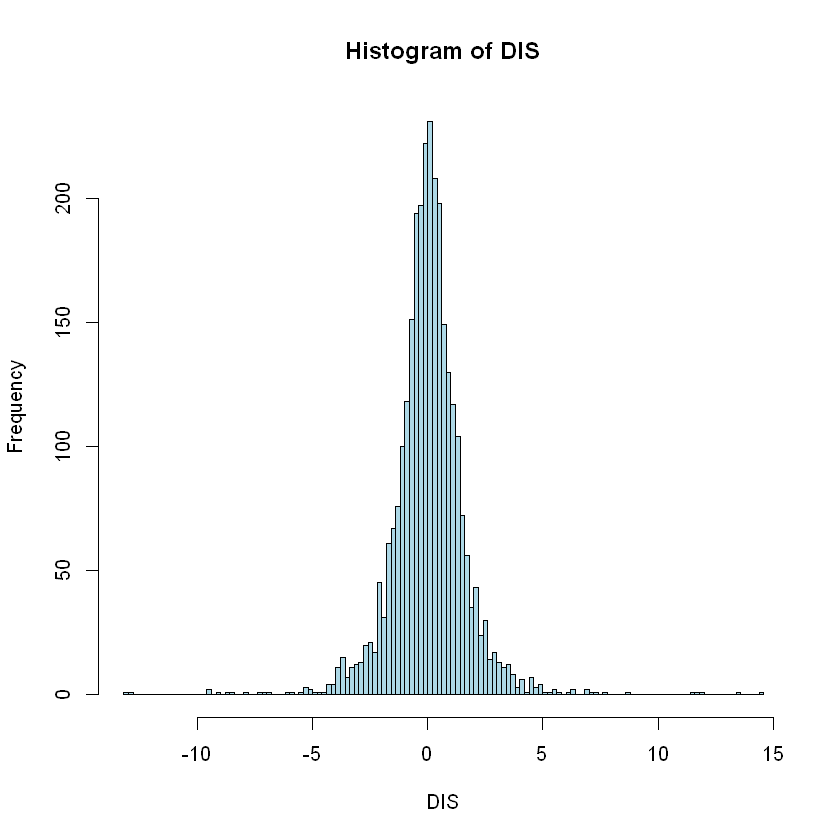

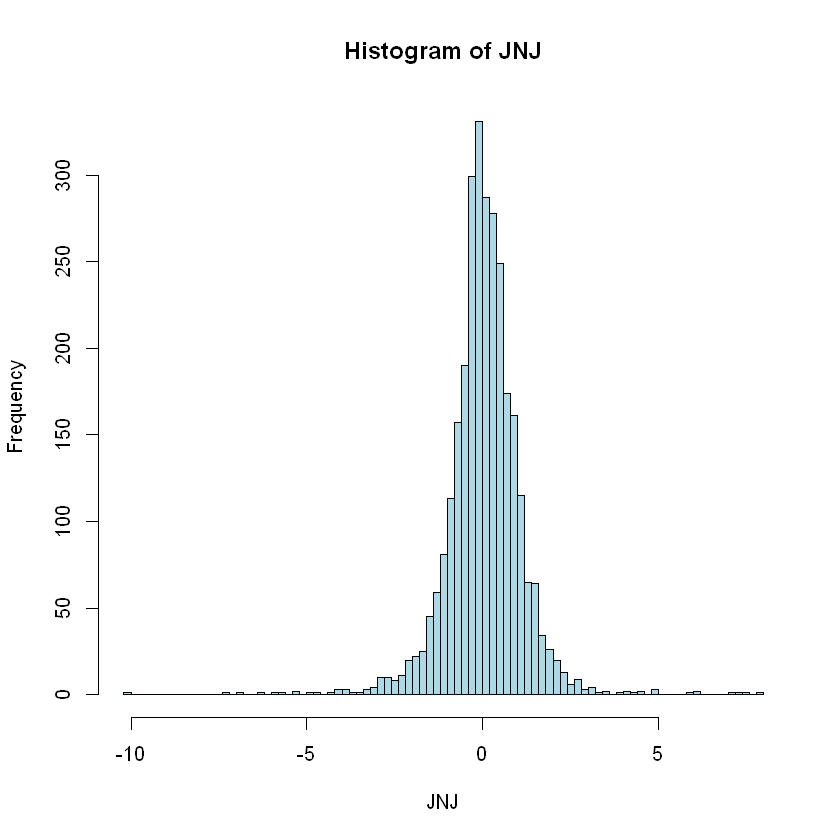

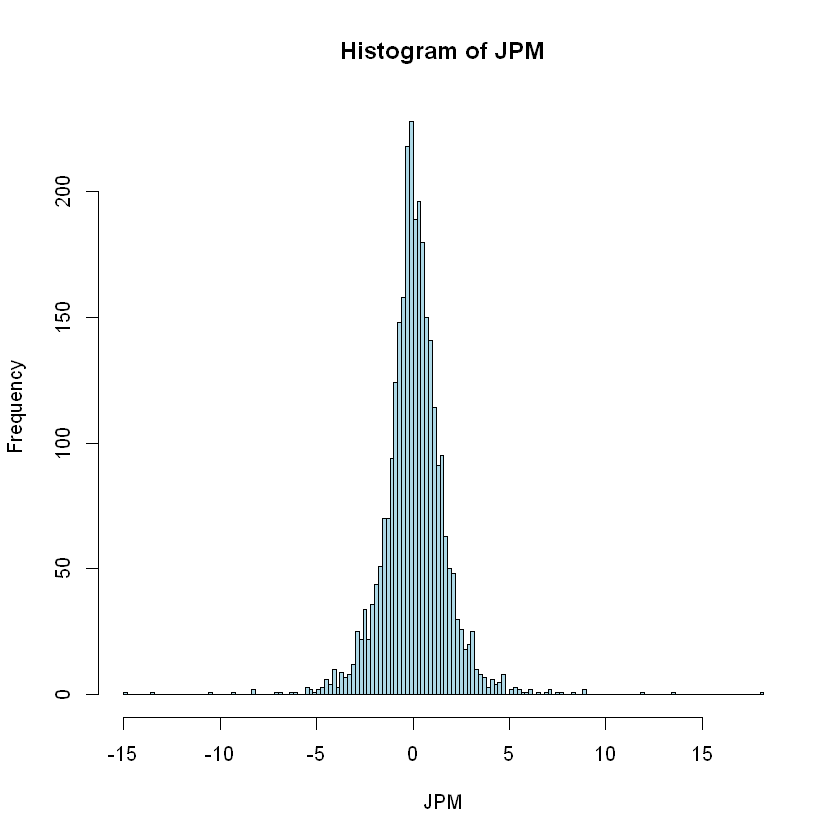

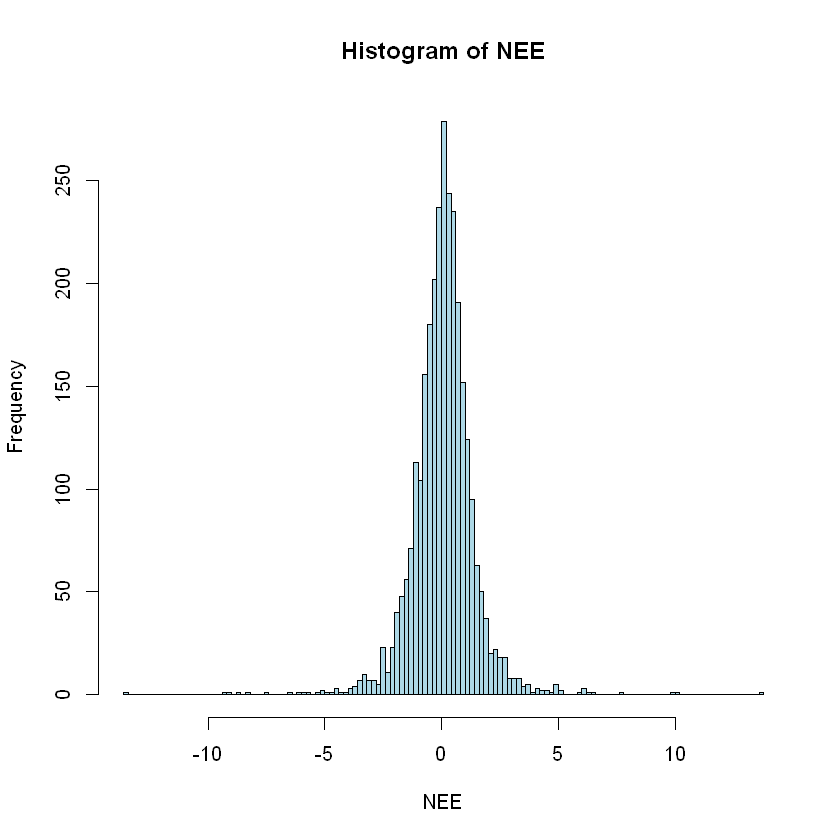

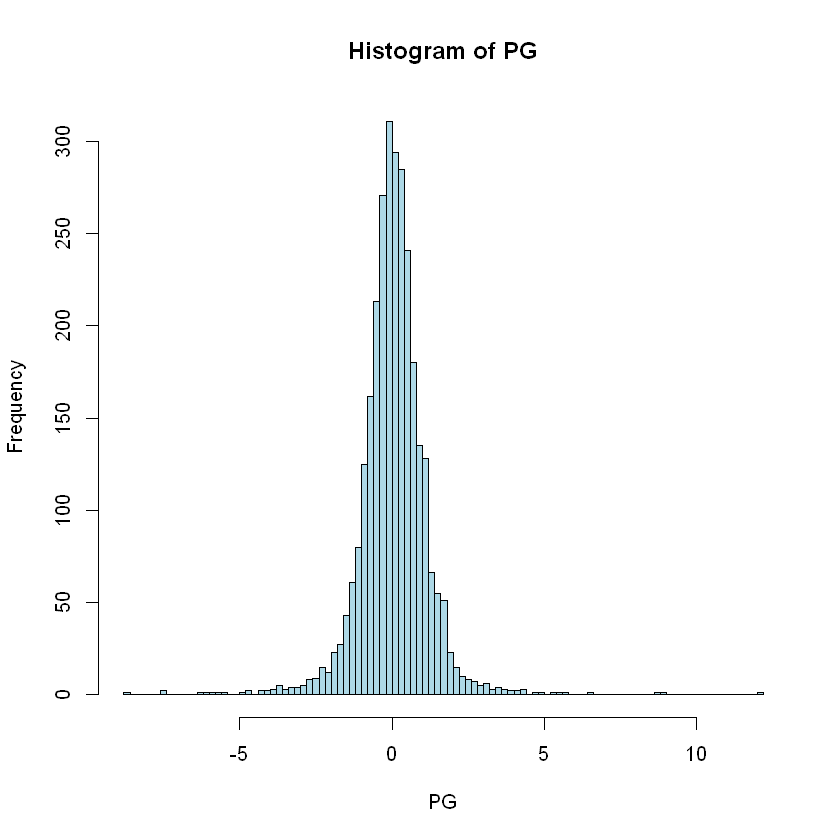

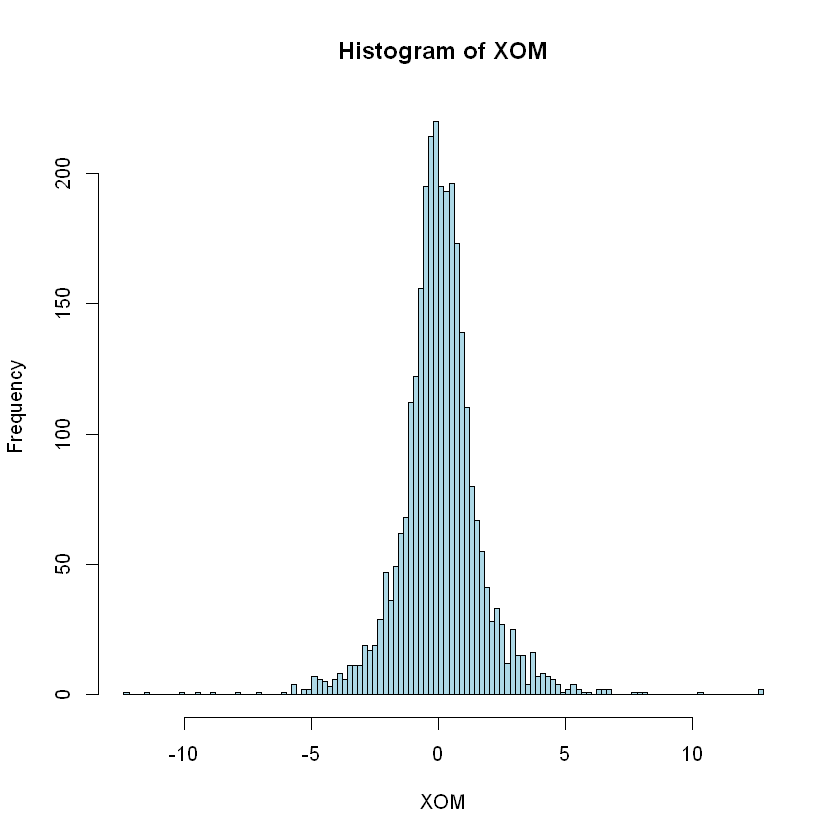

In [5]:
# Apple Inc. (AAPL)
column_name <- "AAPL" 

# Creating histogram
hist(daily_asset_returns[, column_name],
     main = paste("Histogram of", column_name),  # Setting the title
     xlab = column_name,                        # Setting the x-axis label
     col = "lightblue",                        # Setting the fill color
     border = "black",                         # Setting the border color
     breaks = "FD"                             # Setting the number of bins ("FD" for Freedman-Diaconis rule)
)

#Freedman-Diaconis rule:
#Bin Width = 2 * IQR / (n^(1/3))    , IQR= interquartile range, n= no. of data points
#Number of Bins = (max(data) - min(data)) / Bin Width

# The Boeing Company (BA)
column_name <- "BA"

hist(daily_asset_returns[, column_name],
     main = paste("Histogram of", column_name),
     xlab = column_name,                     
     col = "lightblue",                        
     border = "black",                        
     breaks = "FD"                            
)

#The Walt Disney Company (DIS)
column_name <- "DIS"

hist(daily_asset_returns[, column_name],
     main = paste("Histogram of", column_name),
     xlab = column_name,                      
     col = "lightblue",                    
     border = "black",                   
     breaks = "FD"                       
)

# Johnson & Johnson (JNJ)
column_name <- "JNJ"

hist(daily_asset_returns[, column_name],
     main = paste("Histogram of", column_name),
     xlab = column_name,                       
     col = "lightblue",                   
     border = "black",                    
     breaks = "FD"             
)

# JPMorgan Chase & Co. (JPM)
column_name <- "JPM"

hist(daily_asset_returns[, column_name],
     main = paste("Histogram of", column_name), 
     xlab = column_name,                        
     col = "lightblue",                      
     border = "black",                      
     breaks = "FD"                 
)

# NextEra Energy, Inc. (NEE)
column_name <- "NEE"

# Create a histogram for the specified column
hist(daily_asset_returns[, column_name],
     main = paste("Histogram of", column_name), 
     xlab = column_name,         
     col = "lightblue",  
     border = "black",     
     breaks = "FD"                  
)

# Procter & Gamble Company (PG)
column_name <- "PG"

hist(daily_asset_returns[, column_name],
     main = paste("Histogram of", column_name), 
     xlab = column_name,                 
     col = "lightblue",              
     border = "black",       
     breaks = "FD"                        
)

# Exxon Mobil Corporation (XOM)
column_name <- "XOM"

hist(daily_asset_returns[, column_name],
     main = paste("Histogram of", column_name), 
     xlab = column_name,                    
     col = "lightblue",                
     border = "black",             
     breaks = "FD"                            
)

Estimating expected returs and invividual risks of assets:

In [6]:
# Calculating the estimate of daily expected return of each asset
expected_returns <- apply(daily_asset_returns, 2, mean)

# Calculating the estimate of individual risk of each asset
individual_risks <- apply(daily_asset_returns, 2, sd)

# Calculating the variance-covariance matrix for these 8 assets
vcov_matrix <- cov(daily_asset_returns)

# Printing the calculated expected returns, risks and vcov matrix
print("Expected Daily Return of Assets:")
print(expected_returns)
print(paste(""))

print("Risk of Assets:")
print(individual_risks)
print(paste(""))

print("Variance-Covariance Matrix:")
print(vcov_matrix)

[1] "Expected Daily Return of Assets:"
      AAPL         BA        DIS        JNJ        JPM        NEE         PG 
0.10888261 0.07179861 0.04372646 0.04771097 0.07416086 0.07162361 0.04654340 
       XOM 
0.03820269 
[1] ""
[1] "Risk of Assets:"
    AAPL       BA      DIS      JNJ      JPM      NEE       PG      XOM 
1.809306 2.335147 1.633635 1.079972 1.684371 1.356176 1.118231 1.632450 
[1] ""
[1] "Variance-Covariance Matrix:"
          AAPL        BA       DIS       JNJ       JPM       NEE        PG
AAPL 3.2735869 1.6029866 1.2022166 0.6513893 1.2153441 0.7894388 0.7131156
BA   1.6029866 5.4529135 1.9019453 0.7720867 2.1567792 1.0039782 0.6943875
DIS  1.2022166 1.9019453 2.6687644 0.5934147 1.5083814 0.7308762 0.6239237
JNJ  0.6513893 0.7720867 0.5934147 1.1663390 0.7481593 0.6194585 0.6621397
JPM  1.2153441 2.1567792 1.5083814 0.7481593 2.8371069 0.6846585 0.6673831
NEE  0.7894388 1.0039782 0.7308762 0.6194585 0.6846585 1.8392124 0.7645122
PG   0.7131156 0.6943875 0.6239237 0.662

In [7]:
# Initializing parameters for monte-carlo simulation
num_assets <- ncol(daily_asset_returns)
num_portfolios <- 100000    # 1 lakh
risk_free_rate <- 0    #assumption as per assignment

Monte Carlo Simulation

In [8]:
# Defining the parameters of the Dirichlet distribution
alpha <- c(rep(1/num_assets, times = num_assets))

# Generating samples from the Dirichlet distribution
weight_matrix <- rdirichlet(n = num_portfolios, alpha = alpha)    #in these portfolios all the weights will be positive and will be summing up to one

#Displaying the generated samples
#print((paste("weight matrix of size (num_portfolios, num_assets) ")))
#weight_matrix


In [9]:
# Calculating the estimate of daily weighted returns of all the different generated portfolios
portfolio_returns <- expected_returns %*% t(weight_matrix)    # shape of expected returns: (1,8) and shape of weight matrix: (100000,8) , hence took the transpose of weight_matrix
                                                        
# Printing the calculated weighted returns
#print(paste("estimate of expected return of generated portfolios",portfolio_returns))


In [10]:
# Calculating the estimate of risk for all the different generated portfolios

# Creating an empty vector to store portfolio volatilities
portfolio_volatilities <- numeric(num_portfolios)

# Looping through each set of weights
for (i in 1:num_portfolios) {
  # Extracting the weights for the current set
  weights <- weight_matrix[i, ]
  
  # Calculating portfolio variance
  portfolio_variance <- t(weights) %*% vcov_matrix %*% weights    #shape of weights (8,1) and shape of vcov_matrix (8,8)
  
  # Calculating portfolio volatility
  portfolio_volatility <- sqrt(portfolio_variance)
  
  # Storing the result
  portfolio_volatilities[i] <- portfolio_volatility
}

# Now, portfolio_volatilities contains the risk (volatility) for each set of weights


Ans_1 : Creating Efficient frontier: 

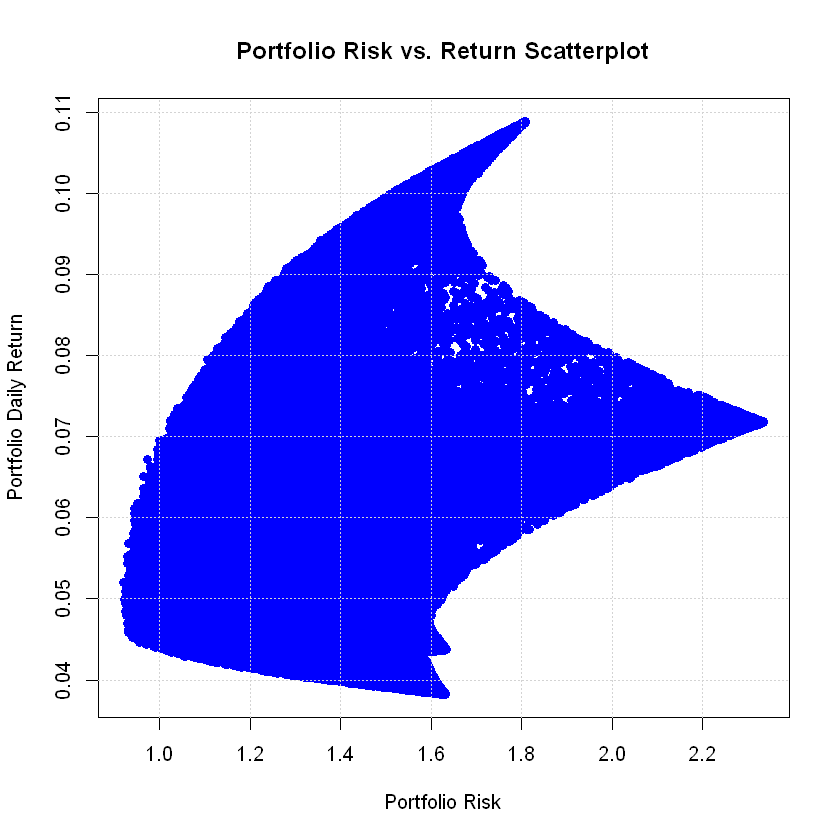

In [11]:
# Creating the scatterplot of risk vs expected return of different generated portfolios
plot(portfolio_volatilities, portfolio_returns, 
     type = "p",            
     pch = 16,                  # Use a solid circle as the point symbol
     col = "blue",              # Point color
     xlab = "Portfolio Risk",   # X-axis label
     ylab = "Portfolio Daily Return", # Y-axis label
     main = "Portfolio Risk vs. Return Scatterplot")  # Title

# Adding a grid to the plot
grid()

Ans_2 : Finding min variance, tangency and maximum diversification portfolio: 

In [12]:
#2(a)MAXIMUM DIVERSIFICATION RATIO

#finding the maximum diversification portfolio out of all different generated portfolios in monte-carlo simulation :

#initializing a function which will take each weight set one by one, the vector of individual risks of initial assets 
#and the variance-covariance matrix of assets.
#function will return the value of diversification ratio.
calculate_diversification_ratio <- function(weights, std_dev_vector, cov_matrix) {
  portfolio_std_dev <- sqrt(t(weights) %*% cov_matrix %*% weights)
  weighted_avg_std_dev <- sum(weights * std_dev_vector)
  
  return(weighted_avg_std_dev / portfolio_std_dev)
}


In [13]:
# will run the above function of each weights-set , and find the weight set for which the diversification ratio is maximum.
# will also store the index of that weight set for further usage.
max_ratio <- -Inf
max_weights <- NULL
max_weight_index <- NULL

for (i in 1:nrow(weight_matrix)) {
  weights <- weight_matrix[i, ]
  ratio <- calculate_diversification_ratio(weights, individual_risks, vcov_matrix)
  
  if (ratio > max_ratio) {
    max_ratio <- ratio
    max_weights <- weights
    max_weight_index <- i
  }
}

print(paste("Maximum Diversification Ratio:", max_ratio))
print(paste(""))

print("Weights for Maximum Diversification Ratio:")
print(max_weights)
print(paste(""))

#print(paste("index of above weight-set:",max_weight_index))

# finding the portfolio with the maximum diversification ratio
max_DR_return <- portfolio_returns[max_weight_index]
max_DR_risk <- portfolio_volatilities[max_weight_index]

print(paste("expected return of maximum diversification portfolio:",max_DR_return))
print(paste(""))
print(paste("Risk of maximum diversification portfolio:",max_DR_risk))

[1] "Maximum Diversification Ratio: 1.45706721332217"
[1] ""
[1] "Weights for Maximum Diversification Ratio:"
[1] 0.134066696 0.097341797 0.036052118 0.324391893 0.008861622 0.194044595
[7] 0.071219955 0.134021324
[1] ""
[1] "expected return of maximum diversification portfolio: 0.0616301752026444"
[1] ""
[1] "Risk of maximum diversification portfolio: 0.999002307018375"


In [14]:
#2(b) MAXIMUM SHARPE RATIO

# Calculating the Sharpe ratio for each simulated portfolio
sharpe_ratios <- (portfolio_returns-risk_free_rate) / portfolio_volatilities

# Finding the portfolio with the maximum Sharpe ratio and the corresponding risk and return
max_sharpe_index <- which.max(sharpe_ratios)
max_sharpe_ratio <- sharpe_ratios[max_sharpe_index]
max_sharpe_return <- portfolio_returns[max_sharpe_index]
max_sharpe_risk <- portfolio_volatilities[max_sharpe_index]

print(paste("max sharpe ratio:", max_sharpe_ratio))
print(paste("expected return of max sharpe ratio portfolio:", max_sharpe_return))
print(paste("Risk of max sharpe ratio portfolio:", max_sharpe_risk))
print(paste(""))

[1] "max sharpe ratio: 0.0719630268255158"
[1] "expected return of max sharpe ratio portfolio: 0.0795481677218928"
[1] "Risk of max sharpe ratio portfolio: 1.10540330543306"
[1] ""


In [15]:
#2(c) MINIMUM VARIANCE PORTFOLIO

# finding the portfolio with the minimum variance out of all generated samples in monte-carlo simulation and the corresponding risk and return
min_variance_index <- which.min(portfolio_volatilities)
min_variance_return <- portfolio_returns[min_variance_index]
min_variance_risk <- portfolio_volatilities[min_variance_index]

print(paste("expected return of min variance simulated portfolio:", min_variance_return))
print(paste("min risk value out of all simulated portfolio:", min_variance_risk))

[1] "expected return of min variance simulated portfolio: 0.0519870477150002"
[1] "min risk value out of all simulated portfolio: 0.921236602825759"


Ans_3 :above portfolios on the Efficient Frontier plot

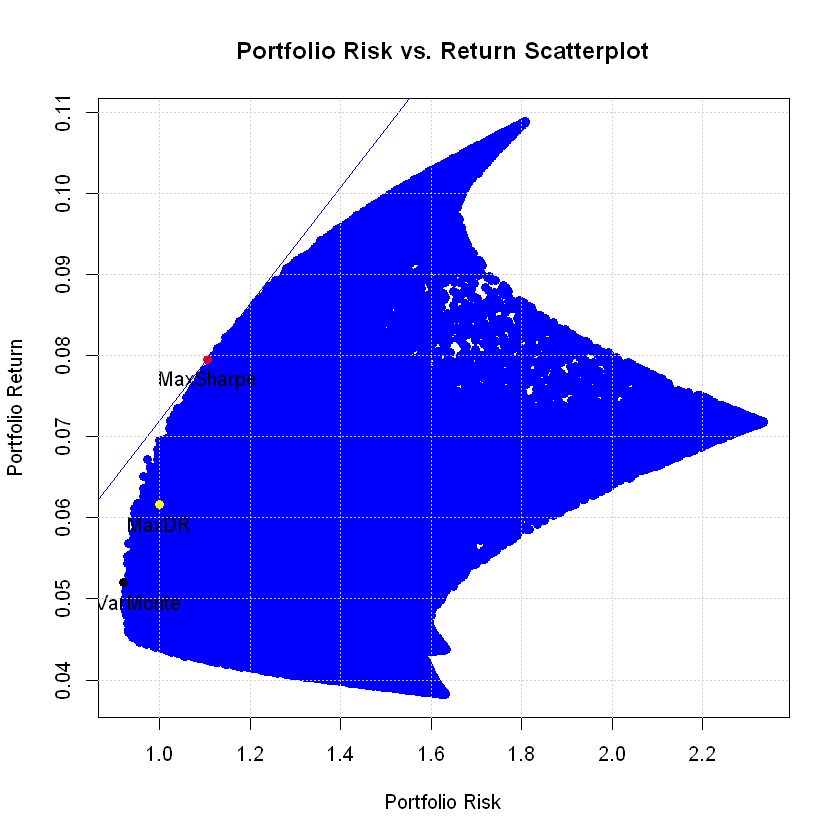

In [16]:
# Creating the scatterplot
plot(portfolio_volatilities, portfolio_returns, 
     type = "p",                  # 'p' for points
     pch = 16,                    # Use a solid circle as the point symbol
     col = "blue",                # Point color for other portfolios
     xlab = "Portfolio Risk",     # X-axis label
     ylab = "Portfolio Return",   # Y-axis label
     main = "Portfolio Risk vs. Return Scatterplot")  # Title

# Add a red dot for the maximum Sharpe portfolio
points(max_sharpe_risk, max_sharpe_return, pch = 16, col = "red")
text(max_sharpe_risk, max_sharpe_return, labels = "MaxSharpe", pos = 1)

# Add a black dot for the minimum variance portfolio (out of all simulated portfolio)
points(min_variance_risk, min_variance_return, pch = 16, col = "black")
text(min_variance_risk, min_variance_return, labels = "MinVarMonte", pos = 1)

# Add a yellow dot for the maximum diversification portfolio
points(max_DR_risk, max_DR_return, pch = 16, col = "yellow")
text(max_DR_risk, max_DR_return, labels = "MaxDR", pos = 1)

# Defining the two points inorder to plot the tangency line
point1 <- c(max_sharpe_risk, max_sharpe_return)  # (x1, y1)
point2 <- c(0, risk_free_rate)  # (x2, y2)

# Calculating the slope and intercept of the 
slope <- max_sharpe_ratio
#slope <- (point2[2] - point1[2]) / (point2[1] - point1[1])
intercept <- point1[2] - slope * point1[1]

# Drawing the line using abline with the calculated slope and intercept
abline(a = intercept, b = slope, col = "blue")

# Adding a grid
grid()

Ans_4: challenging aspect of this assignment :

In [17]:
"As we employed monte carlo simulation for this assignment, the challenging task was to simulate portfolios in such a way
that the sample effectively represents the super set of every possible portfolio.

Hence, ideally we would to like weights (for every asset) to come from a uniform distribution, U(0,1). But in the below
plotted histograms of 1st , 2nd and 3rd weights of the dirichlet simulated weight sets, we can see that the distribution
of each weight is highly right skewed, means we are rarely assigning extreme weights to these assets in our simulation.

We also tried an alternative method but faced the same issue and ended up with approximately the shape of histograms.

Following is the alternative method for sampling weights:

Lets say we want to sample W1,W2,W3......Wn weights.
We sample the 1st weight (W1) from uniform(0,1). Then we sample the 2nd weight (W2) from uniform(0,1-w1) and 3rd weight (W3)
from uniform(0,1-w1-w2) and so on. Finally we assign the value of wn=1-w1-w2-w3-w4...-wn-1 to Wn.
where, w1,w2,w3...wn are the realised value of W1,W2,W3...Wn during simulation.

In this way we can ensure two constraints 1. all weights are >=0, 2. sum of weights is 1. But the problem with this method
is, over large number of simulations, E[Wx]<E[Wy] for every x>y. i.e on an avg, values of successive weights will be lower
and lower. Hence we will hardly assign a weights closer to 1 for nth or (n-1) asset.
We overcome this problem by suffling the weight vector, by this we will be able to assign closer to  one weights to nth or 
(n-1)th asset, but again as stated above , the histogram of each weight was found to be highly rightly skewed.

Below is the code for this sampling approach."

[1] "As we employed monte carlo simulation for this assignment, the challenging task was to simulate portfolios in such a way\nthat the sample effectively represents the super set of every possible portfolio.\n\nHence, ideally we would to like weights (for every asset) to come from a uniform distribution, U(0,1). But in the below\nplotted histograms of 1st , 2nd and 3rd weights of the dirichlet simulated weight sets, we can see that the distribution\nof each weight is highly right skewed, means we are rarely assigning extreme weights to these assets in our simulation.\n\nWe also tried an alternative method but faced the same issue and ended up with approximately the shape of histograms.\n\nFollowing is the alternative method for sampling weights:\n\nLets say we want to sample W1,W2,W3......Wn weights.\nWe sample the 1st weight (W1) from uniform(0,1). Then we sample the 2nd weight (W2) from uniform(0,1-w1) and 3rd weight (W3)\nfrom uniform(0,1-w1-w2) and so on. Finally we assign the value of wn=1-w1-w2-w3-w4...-wn-1 to Wn.\nwhere, w1,w2,w3...wn are the realised value of W1,W2,W3...Wn during simulation.\n\nIn this way we can ensure two constraints 1. all weights are >=0, 2. sum of weights is 1. But the problem with this method\nis, over large number of simulations, E[Wx]<E[Wy] for every x>y. i.e on an avg, values of successive weights will be lower\nand lower. Hence we will hardly assign a weights closer to 1 for nth or (n-1) asset.\nWe overcome this problem by suffling the weight vector, by this we will be able to assign closer to  one weights to nth or \n(n-1)th asset, but again as stated above , the histogram of each weight was found to be highly rightly skewed.\n\nBelow is the code for this sampling approach."

Histogram of dirichlet simulated weights:

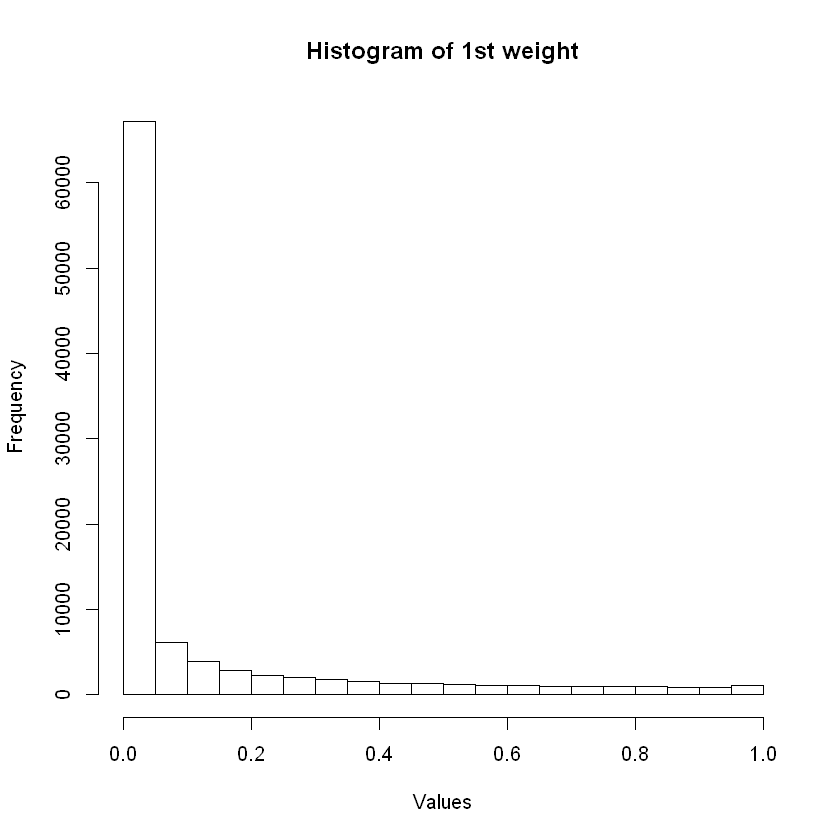

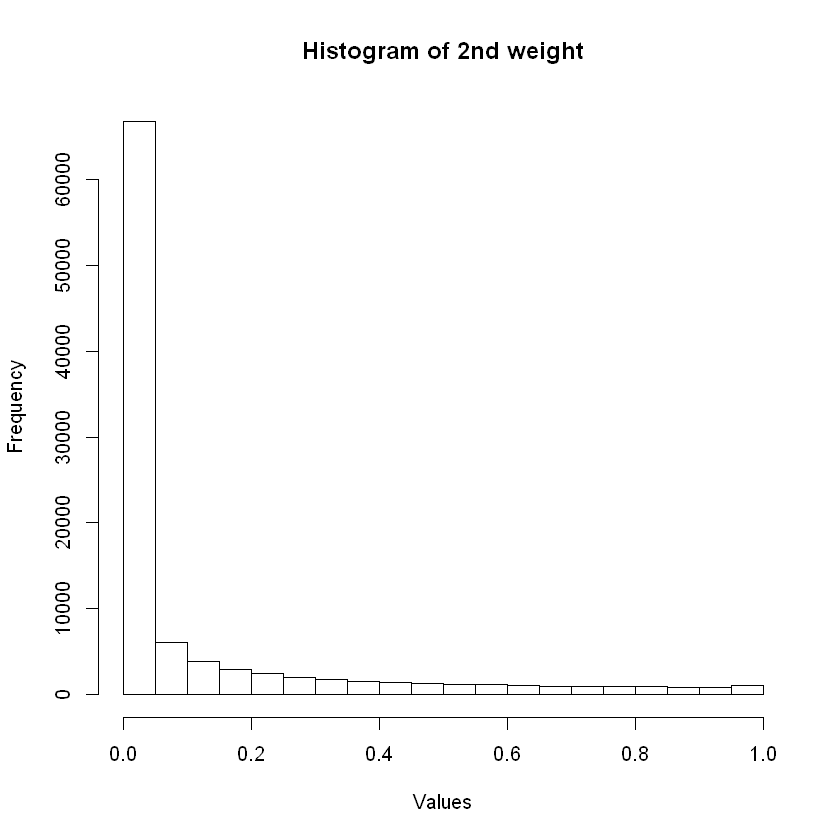

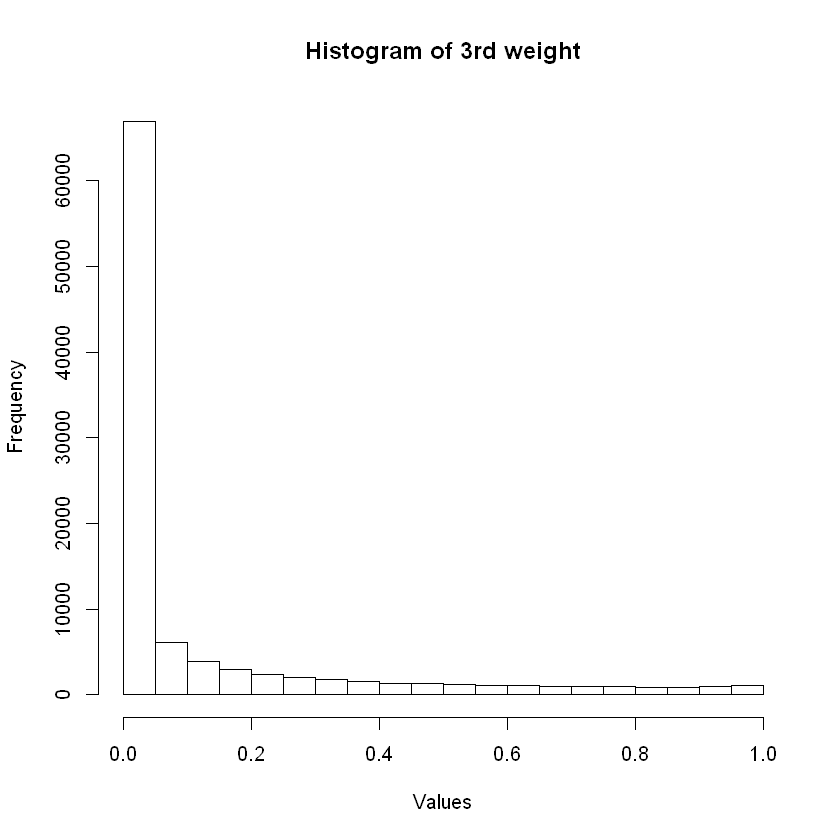

In [18]:
# Creating a histogram of the columns of the weight_matrix
hist(weight_matrix[, 1], main = "Histogram of 1st weight", xlab = "Values", ylab = "Frequency")
hist(weight_matrix[, 2], main = "Histogram of 2nd weight", xlab = "Values", ylab = "Frequency")
hist(weight_matrix[, 3], main = "Histogram of 3rd weight", xlab = "Values", ylab = "Frequency")

In [19]:
#alternative method of sampling:
#It is also a time consuming method, running this can take 4 to 5 mins

num_portfolios <- 100000
num_columns <- ncol(daily_asset_returns)


weight_generator <- function(num_portfolios, num_columns) {
    
  weight_matrix <- matrix(nrow = 0, ncol = num_columns)  
    
  for (i in 1:num_portfolios) {
    curr_set <- numeric()
    temp <- 0
    w1 <- runif(1, 0, 1 - temp)
    curr_set <- c(curr_set, w1)
    temp <- temp + w1
      
    w2 <- runif(1, 0, 1 - temp)
    curr_set <- c(curr_set, w2)
    temp <- temp + w2
      
    w3 <- runif(1, 0, 1 - temp)
    curr_set <- c(curr_set, w3)
    temp <- temp + w3
      
    w4 <- runif(1, 0, 1 - temp)
    curr_set <- c(curr_set, w4)
    temp <- temp + w4
      
    w5 <- runif(1, 0, 1 - temp)
    curr_set <- c(curr_set, w5)
    temp <- temp + w5
      
    w6 <- runif(1, 0, 1 - temp)
    curr_set <- c(curr_set, w6)
    temp <- temp + w6
      
    w7 <- runif(1, 0, 1 - temp)
    curr_set <- c(curr_set, w7)
    temp <- temp + w7
      
    w8 <- 1 - temp
    curr_set <- c(curr_set, w8)

  final_set <- sample(curr_set)
  weight_matrix <- rbind(weight_matrix, final_set)
  }
  return(weight_matrix)
}

# Call the function to generate weights
weight_matrix_alternate <- weight_generator(num_portfolios, num_columns)

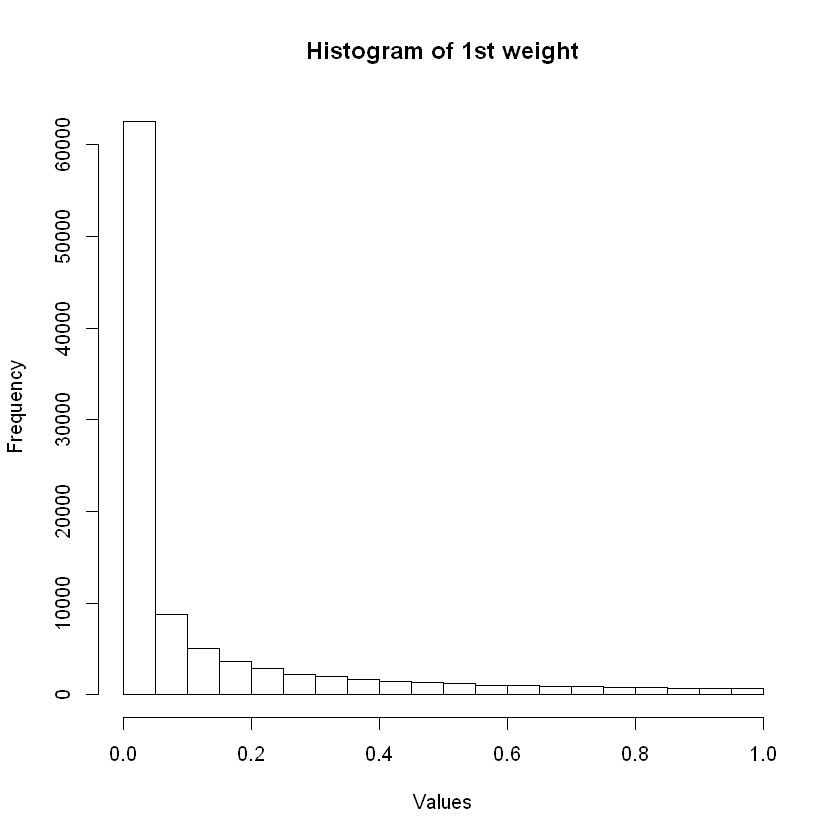

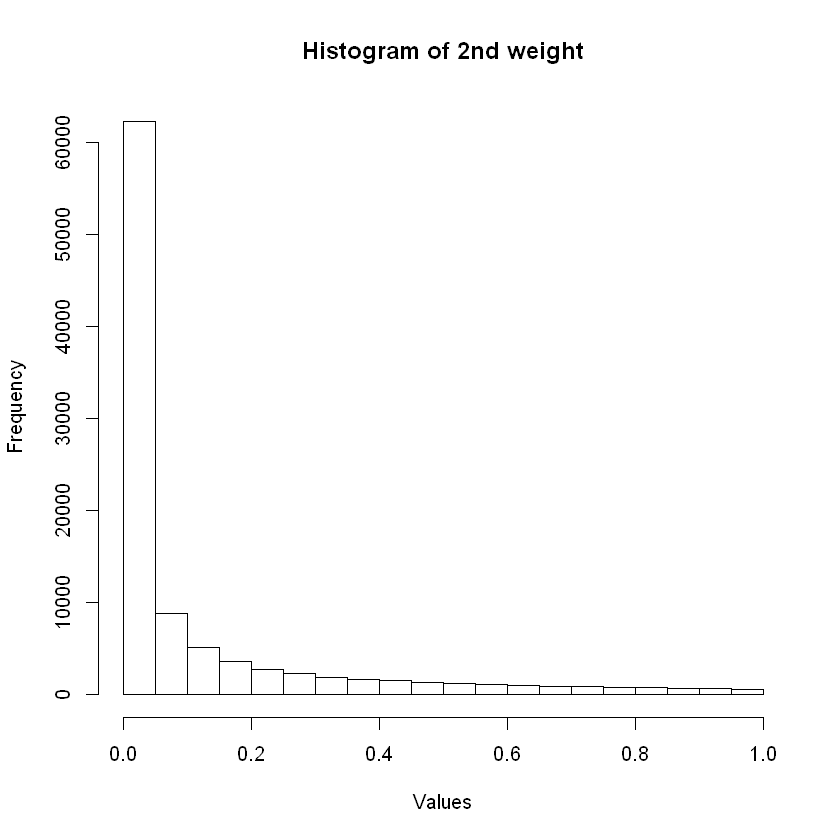

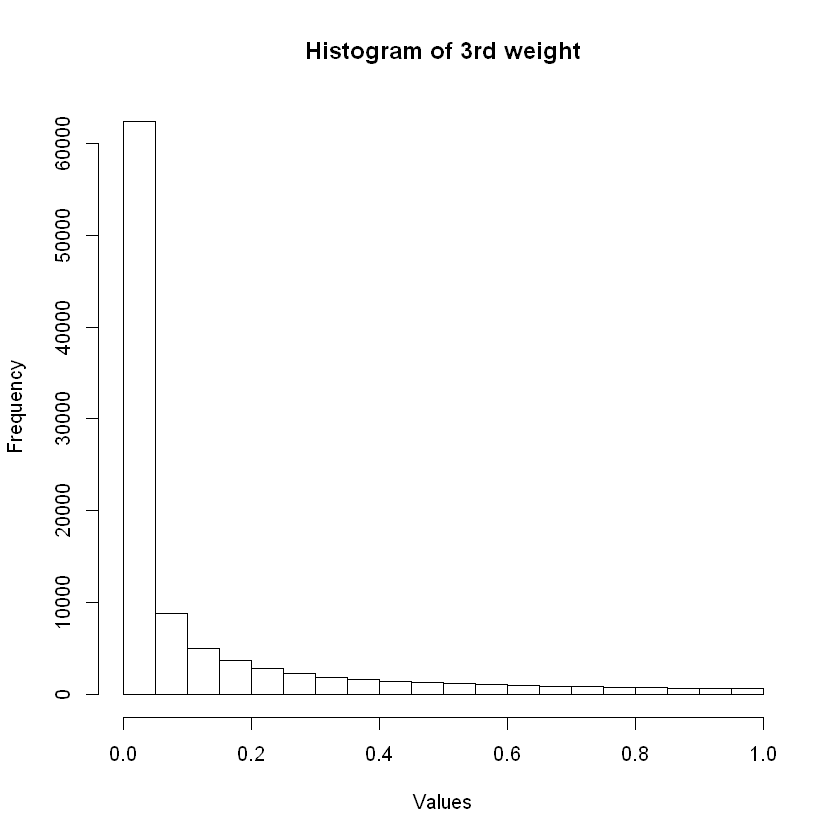

In [20]:
# Creating a histogram of the columns of the weight_matrix_alternate
hist(weight_matrix_alternate[, 1], main = "Histogram of 1st weight", xlab = "Values", ylab = "Frequency")
hist(weight_matrix_alternate[, 2], main = "Histogram of 2nd weight", xlab = "Values", ylab = "Frequency")
hist(weight_matrix_alternate[, 3], main = "Histogram of 3rd weight", xlab = "Values", ylab = "Frequency")